In [1]:
# import needed library
import os
import logging
import random
import warnings


from datasets.ssl_dataset import SSL_Dataset
from datasets.data_utils import get_data_loader

# Construct Dataset
train_dset = SSL_Dataset(name='thraws_swir', train=True, data_dir='/data/PyDeepLearning/MSMatch/DATA/warmup_events_dataset', seed=42,)
lb_dset, ulb_dset = train_dset.get_ssl_dset(10)

/home/warmachine/anaconda3/envs/torchmatch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


(10, 256, 256, 3)


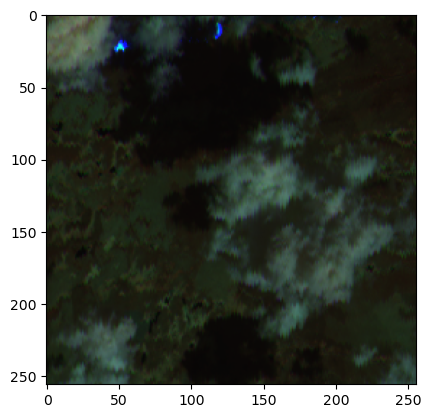

In [2]:
import matplotlib.pyplot as plt  

imgs = lb_dset.data
print(imgs.shape)
label = lb_dset.targets

plt.imshow(imgs[0,:,:,:]/imgs[0,:,:,:].max())

In [3]:
from torch.utils.data import DataLoader

lb_dset_loader = DataLoader(lb_dset, batch_size=2, shuffle=True, num_workers=0)
ulb_dset_loader = DataLoader(ulb_dset, batch_size=2, shuffle=True, num_workers=0)

In [16]:
from datasets.data_utils import get_data_loader


# Construct data loader
loader_dict = {}
dset_dict = {"train_lb": lb_dset, "train_ulb": ulb_dset,}

loader_dict["train_lb"] = get_data_loader(
        dset_dict["train_lb"],
        6,
        data_sampler="RandomSampler",
        num_iters=10,
        num_workers=4,
        distributed=False,
    )

loader_dict["train_ulb"] = get_data_loader(
        dset_dict["train_ulb"],
        6,
        data_sampler="RandomSampler",
        num_iters=10,
        num_workers=4 * 4,
        distributed=False,
    )


# ## set DataLoader on FixMatch
# model.set_data_loader(loader_dict)

# # If args.resume, load checkpoints from args.load_path
# if args.resume:
#        print("Resuming model located at: ", args.load_path)
#        model.load_model(args.load_path)

# # START TRAINING of FixMatch
# trainer = model.train
# for epoch in range(args.epoch):
#        trainer(args, logger=logger)

# if not args.multiprocessing_distributed or (
#         args.multiprocessing_distributed and args.rank % ngpus_per_node == 0):
#         model.save_model("latest_model.pth", save_path)

#     logging.warning(f"GPU {args.rank} training is FINISHED")

In [17]:
for (x_lb, y_lb), (x_ulb_w, x_ulb_s, _) in zip(
            loader_dict["train_lb"], loader_dict["train_ulb"]):
    print(x_lb)    
    

    

/home/warmachine/anaconda3/envs/torchmatch/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/home/warmachine/anaconda3/envs/torchmatch/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/home/warmachine/anaconda3/envs/torchmatch/lib/python3.8/site-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/home/warmachine/anaconda3/envs/torchmatch/lib/python3.8/site-packages/torch

tensor([[[[0.0275, 0.0275, 0.0275,  ..., 0.1294, 0.1294, 0.1294],
          [0.0275, 0.0275, 0.0235,  ..., 0.1216, 0.1216, 0.1216],
          [0.0314, 0.0275, 0.0275,  ..., 0.1333, 0.1333, 0.1373],
          ...,
          [0.0745, 0.0784, 0.0745,  ..., 0.0863, 0.0902, 0.0941],
          [0.0706, 0.0784, 0.0824,  ..., 0.0824, 0.0824, 0.0863],
          [0.0706, 0.0745, 0.0824,  ..., 0.0863, 0.0824, 0.0902]],

         [[0.0314, 0.0314, 0.0353,  ..., 0.1725, 0.2078, 0.2039],
          [0.0353, 0.0353, 0.0392,  ..., 0.1333, 0.2196, 0.2235],
          [0.0353, 0.0353, 0.0392,  ..., 0.1176, 0.1922, 0.2039],
          ...,
          [0.0549, 0.0549, 0.0549,  ..., 0.1294, 0.0980, 0.0902],
          [0.0549, 0.0549, 0.0549,  ..., 0.1137, 0.1176, 0.1098],
          [0.0549, 0.0549, 0.0510,  ..., 0.1020, 0.1333, 0.1255]],

         [[0.0353, 0.0314, 0.0353,  ..., 0.1137, 0.0824, 0.0784],
          [0.0353, 0.0353, 0.0392,  ..., 0.0824, 0.1059, 0.1059],
          [0.0392, 0.0353, 0.0431,  ..., 0

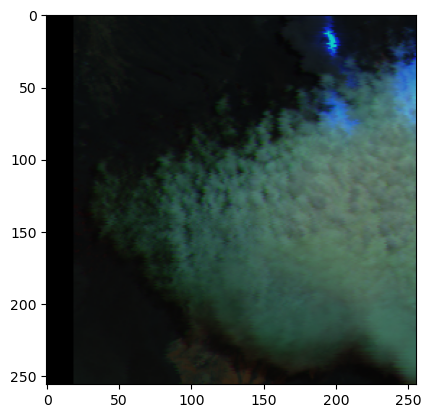

In [21]:
plt.imshow(x_lb[2].transpose(0,2))

In [19]:
x_lb[1].transpose(0,2).max()

tensor(0.2745)

In [20]:
y_lb

tensor([1, 1, 0, 0, 1, 0])